# Math Proficiency & Social Factors
## by Andres Crucetta Nieto

## Investigation Overview

> My goal in this presentation is to explore and present what are factors that contribute to high levels of math proficiency across students in the United States.

## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

chunksize = 10 ** 5
for chunk in pd.read_csv(r'C:\Users\acrucettan003\Documents\Udacity/Data Viz Project/pisa2012.csv', chunksize=chunksize, encoding = 'latin1'):
    df = chunk

In [3]:
# Filtering dataframe for values within the U.S.

df['CNT'].value_counts()
df_US = df[df['CNT'].str.contains('USA')]
df_US.CNT.value_counts()

# Filtering dataframe for the values we're interested in

column_filters = ['CNT','ST17','ST25','ST42','ST46','ST26','ST14','ST49','MATH']

df_US.loc[:, df_US.columns.str.contains('|'.join(column_filters))]

,CNT,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST17Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,...,ST49Q06,ST49Q07,ST49Q09,MATHEFF,USEMATH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
407155,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Often,Always or almost always,Never or rarely,0.15,NaN,485.2080,443.9243,489.1027,442.3664,422.8930
407156,Florida (USA),NaN,NaN,Yes,NaN,<ISCED level 3A>,Other language,No,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.33,NaN,419.3878,430.2929,403.0301,407.7037,448.9874
407157,Florida (USA),Yes,Yes,NaN,NaN,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,1.47,NaN,517.8455,552.8976,534.9821,567.6975,557.5713
407158,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.63,NaN,457.3999,455.8420,472.9787,467.5261,494.0100
407159,Florida (USA),No,No,No,Yes,NaN,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,644.3449,585.9246,560.2197,645.9028,650.5764
407160,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,No,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.48,NaN,444.1580,405.2111,432.4739,476.0944,514.2623
407161,Florida (USA),No,Yes,Yes,No,<ISCED level 3A>,Language of the test,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,532.2558,582.8867,570.4237,587.5604,567.3080
407162,Florida (USA),Yes,Yes,No,No,<ISCED level 3A>,Other language,Yes,Yes,Yes,...,Always or almost always,Never or rarely,Always or almost always,2.27,NaN,498.7615,469.1619,477.7302,485.5196,477.7302
407163,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,436.1349,471.1871,503.1235,434.5770,466.5135
407164,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,623.4694,607.8906,549.4703,601.6591,558.8176


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Range of PV5 - Mathematical Literacy

> Based on the range of mathematical literacy we have most of the students around a Level 2 & 3 with some outliers at both ends. 

![title](Documents/Udacity/img/CAPTURE.png)

Text(0.5, 0, 'Levels of Literacy')

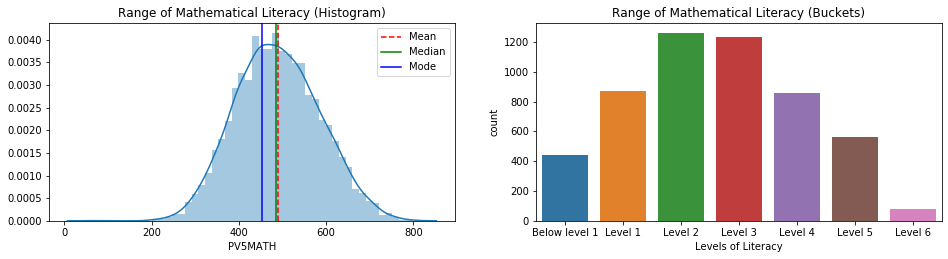

In [4]:
# Categorizing the levels of literacy based on the table description
df_US["PV5_literacy"] = pd.cut(x=df_US['PV5MATH'], bins=[0, 357.8, 420.1,482.4,544.7,607,699.3,max(df_US.PV5MATH)], 
                               labels=['Below level 1', 'Level 1', 'Level 2','Level 3','Level 4','Level 5','Level 6'])

# Calculate Mean, Median and Mode
mean= df_US.PV5MATH.mean()
median= df_US.PV5MATH.median()
mode= df_US.PV5MATH.mode().get_values()[0]

# Plotting the raw distribution of values
fig = plt.figure(figsize=(16, 8))

ax = plt.subplot(2,2,1)
sb.distplot(df_US.PV5MATH)
plt.title("Range of Mathematical Literacy (Histogram)")
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode, color='b', linestyle='-')
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

box = plt.subplot(2,2,2)
sb.countplot(df_US.PV5_literacy)
plt.title("Range of Mathematical Literacy (Buckets)")
plt.xlabel("Levels of Literacy")

## Does helping others study increases math literacy score?

> It seems like it does, up to a point!. We have an interesting finding in that student that "Always" or "Almost Always" help other students study don't do as well as those who do it just "Often". My assumption is that those students that do it "Often" have more time for their own studies. We would need to explore other levels of literacy to understand this better.

Text(0, 0.5, 'Score in the Level 5 Literacy Test')

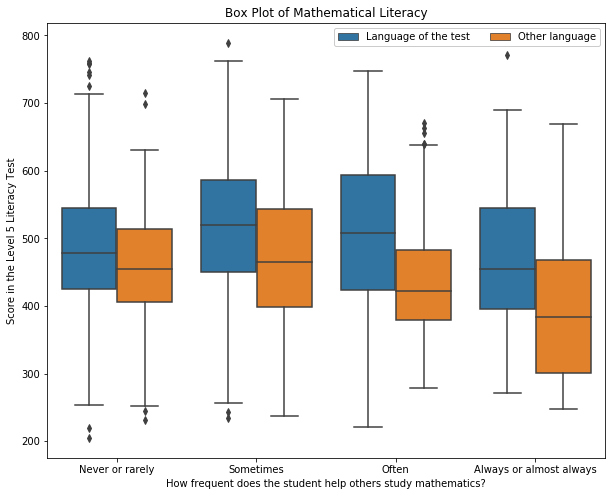

In [5]:
plt.figure(figsize = (10,8))
ax = sb.boxplot(data = df_US, x = 'ST49Q01', y = 'PV5MATH',hue = 'ST25Q01')
ax.legend(loc = 1, ncol = 3, framealpha = 1)
plt.title('Box Plot of Mathematical Literacy')
plt.xlabel('How frequent does the student help others study mathematics?')
plt.ylabel('Score in the Level 5 Literacy Test')

## Are students that study more than 2 hours / day more literate?

> They are. Those students that study more than two hours have on average a higher level of literacy than other cohorts. Big finding for students looking to improve their grades. More study hours pays off.


Text(0.5, 0, 'Levels of Literacy')

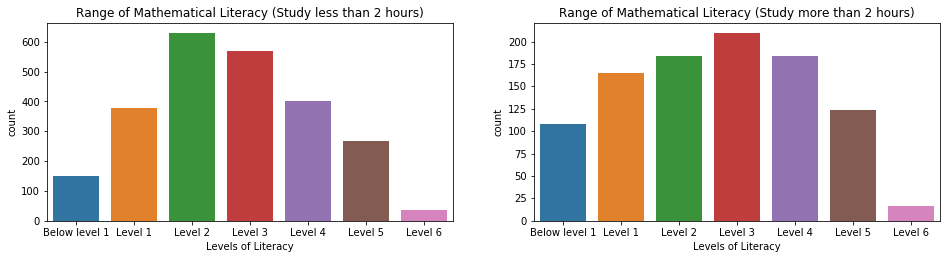

In [6]:
# Filtering values for students who study more and less than 2 hours
df_US_more2 = df_US[df_US.ST49Q05.isin(['Often','Always or almost always','Sometimes'])]
df_US_less2 = df_US[df_US.ST49Q05.isin(['Never or rarely'])]

# Level of Mathemtical Literacy
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sb.countplot(df_US_less2.PV5_literacy)
plt.title("Range of Mathematical Literacy (Study less than 2 hours)")
plt.xlabel("Levels of Literacy")

plt.subplot(2,2,2)
sb.countplot(df_US_more2.PV5_literacy)
plt.title("Range of Mathematical Literacy (Study more than 2 hours)")
plt.xlabel("Levels of Literacy")

## What type of guided study helps a student the most?

> It seems like the amount of time spent doing homework correlates with higher levels of Math Literacy. Guided Homework and Parent's study time doesn't perform as well. 

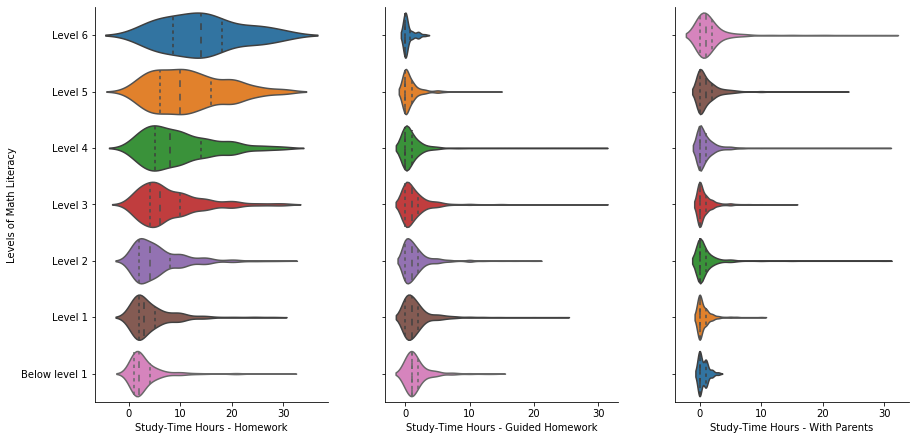

In [7]:
g = sb.PairGrid(data = df_US, y_vars = ['PV5_literacy'], x_vars = ['ST57Q01','ST57Q02','ST57Q05'], hue = 'PV5_literacy', 
                hue_order = ['Level 6','Level 5','Level 4','Level 3','Level 2','Level 1','Below level 1'])

g.map(sb.violinplot, inner = 'quartile')
g.fig.set_size_inches(13,8)
g.axes[0,0].set_ylabel("Levels of Math Literacy")

# Replacing question numbers with an understandable axis label
replacements = {'ST57Q01': "Study-Time Hours - Homework", 'ST57Q02': "Study-Time Hours - Guided Homework",
                'ST57Q05': "Study-Time Hours - With Parents"}

for i in range(1):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])

## How does the study time for homework varies across students with different languages?

> This is an interesting finding. Students who have a different than that of the test actually spend more time in their homework to reach similar levels of literacy than those for whom the test is their first language. Hard work pays off.

Text(0.5, 0, 'Level of Math Literacy')

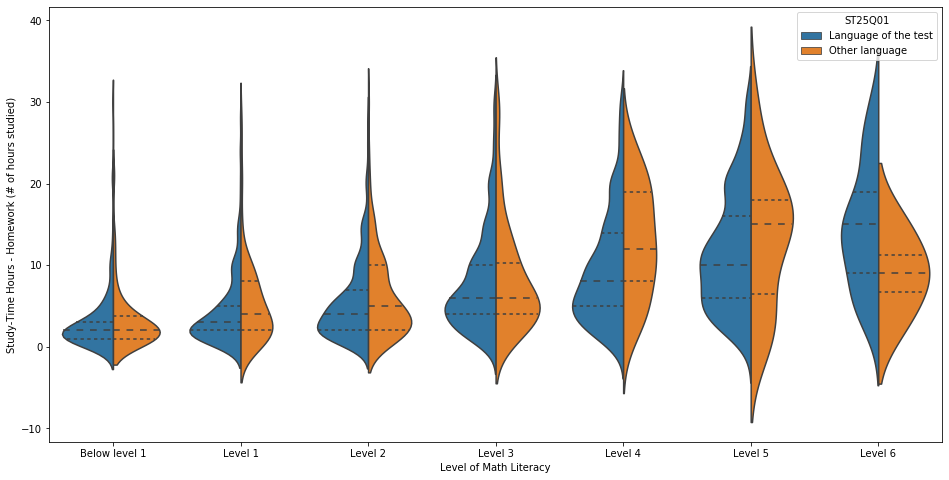

In [8]:
plt.figure(figsize = (16,8)) 
sb.violinplot(data = df_US, x = 'PV5_literacy', y = 'ST57Q01', hue = 'ST25Q01', inner = 'quartile', split=True)
plt.ylabel("Study-Time Hours - Homework (# of hours studied)")
plt.xlabel("Level of Math Literacy")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!